In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 
import math
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) 
                y_pred = self(x, training = True) 
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)

            #ecuacion diferencial  x dy/dx + y = x^2 cos(x)
            eq = x* dy +y_pred - x*x*tf.cos(x)
            
            #condicion inicial
            ic = y_o -0.
            
            #funcion de costo
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) 
    
   
        grads =tape.gradient(loss, self.trainable_variables)
    
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial  
        return  {"loss": self.loss_tracker.result()}

In [13]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer = RMSprop(), metrics = ['loss'])

Model: "od_esolver_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [14]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 1s 2ms/step - loss: 0.2132
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3438
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3087
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2110
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2211
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2140
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3029
Epoch 9/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2810
Epoch 10/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2788
Epoch 11/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2437
Epoch 12/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2661
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 104/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0321
Epoch 105/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 106/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 107/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0236
Epoch 108/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0422
Epoch 109/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 110/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 111/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 112/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 113/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 114/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 205/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 206/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 207/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 208/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 209/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 210/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0254
Epoch 211/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 212/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 213/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 214/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 215/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 306/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 307/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 310/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 311/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 312/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 313/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 314/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 315/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 316/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 407/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 408/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 409/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0287
Epoch 410/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 411/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 412/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 413/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 414/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 415/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 416/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 417/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 418/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 508/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 509/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 510/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 511/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 512/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 513/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 514/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 515/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 516/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 517/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 518/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 609/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 610/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 611/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 612/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 614/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 615/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 616/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 618/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 619/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 710/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 711/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 712/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 713/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 714/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 715/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 716/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 717/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 718/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 719/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 720/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 811/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 812/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 813/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 814/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 815/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 816/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 817/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 818/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 819/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 820/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 821/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 912/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 913/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 914/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 915/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 916/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 917/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 918/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 919/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 920/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.4988e-04
Epoch 921/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 922/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 923/1000
4/4 [===================

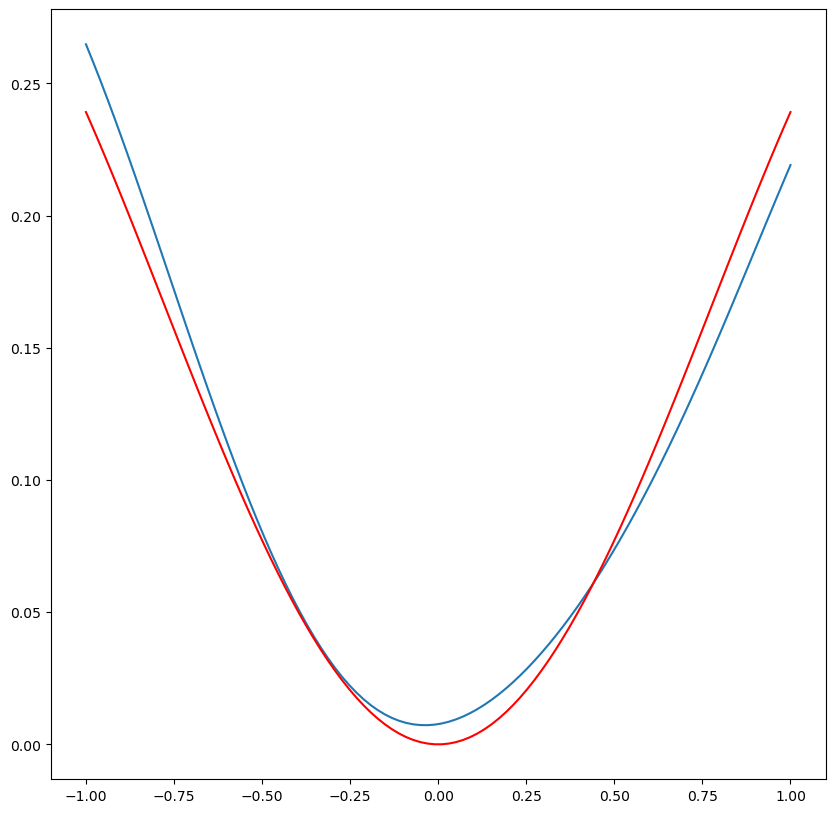

In [15]:
plt.figure(figsize = (10,10))
plt.plot(x_testv, a)
#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, x*np.sin(x) -2.*(-x*np.cos(x)+ np.sin(x))/x, color = "red")
plt.show()